In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Support Vector Machines

Support Vector Machines are models used for classification and regression tasks. They find the best hyperplane to separate different classes while maximizing the margin between them, even in high-dimensional spaces. SVMs are powerful for handling both linearly separable and non-linearly separable data through the kernel trick.

[Support Vector Machines Part 1 (of 3): Main Ideas!!!](https://youtu.be/efR1C6CvhmE?si=HgYM5nsutLUd1jbM)

![](https://www.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1706525568968.jpg)

## Intuition

Support Vector Machines aim to find the hyperplane that best separates different classes by maximizing the margin between them. This geometric approach minimizes the risk of misclassification and enhances generalization to unseen data. SVM efficiently handles non-linearly separable data using the kernel trick, mapping inputs into higher-dimensional spaces. It relies only on support vectors, reducing computational complexity and memory usage. By introducing a regularization parameter, SVM balances between maximizing margin and minimizing error, preventing overfitting. Its intuitive principles make SVM a popular choice for classification tasks in machine learning.

**Equation of hyperplane passing through origin in m-dimensions:**
$$ W^T \cdot X = 0 $$

**Support Vector Constraints:**

$$Y_i \cdot (W \cdot X_i + b) \ \ \ \ 
  \begin{cases}
    =1       & \quad  \text{ for support vectors} \\
    >1 & \quad  \text{ for remaining points}
  \end{cases}
$$

![](https://fderyckel.github.io/machinelearningwithr/otherpics/svm1.png)

## Types of Support Vector Machines

1. Linear SVM
    - Hard Margin SVM
    - Soft Margin SVM
 
2. Non-Linear SVM
    - Radial Basis Function Kernel
    - Polynomial Kernel

### Linear Support Vector Machines

It is a method used to classify data points by drawing a straight line (or plane) between them. It's commonly used in text classification for tasks like sentiment analysis or topic categorization in chatbots.

#### Hard Margin SVM

It is a type of Support Vector Machine that strictly enforces a margin with no misclassification allowed in the training data. It works well when the data is linearly separable and there are no outliers.

**Cost Function:** 
$$J(W) = \text{argmax}_{(w,b)} \frac{2}{||W||}$$

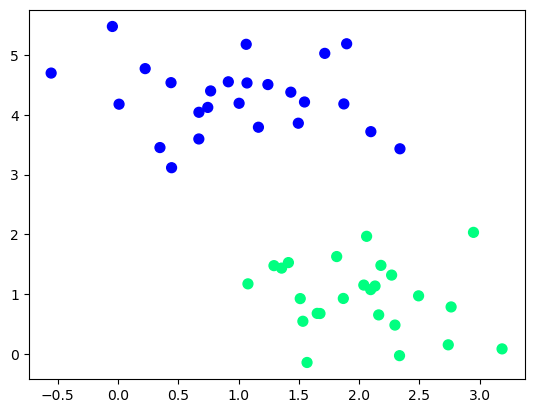

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

In [6]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)

model.fit(X, y)

SVC(C=1, kernel='linear')

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


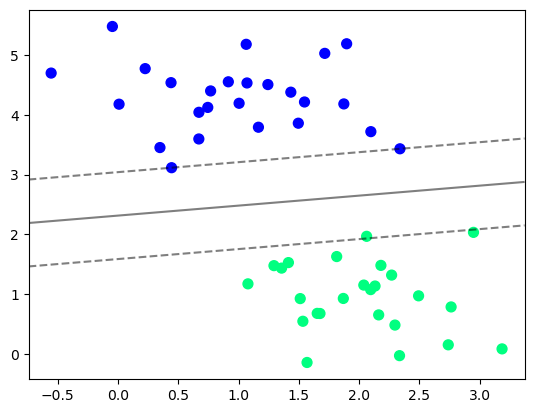

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

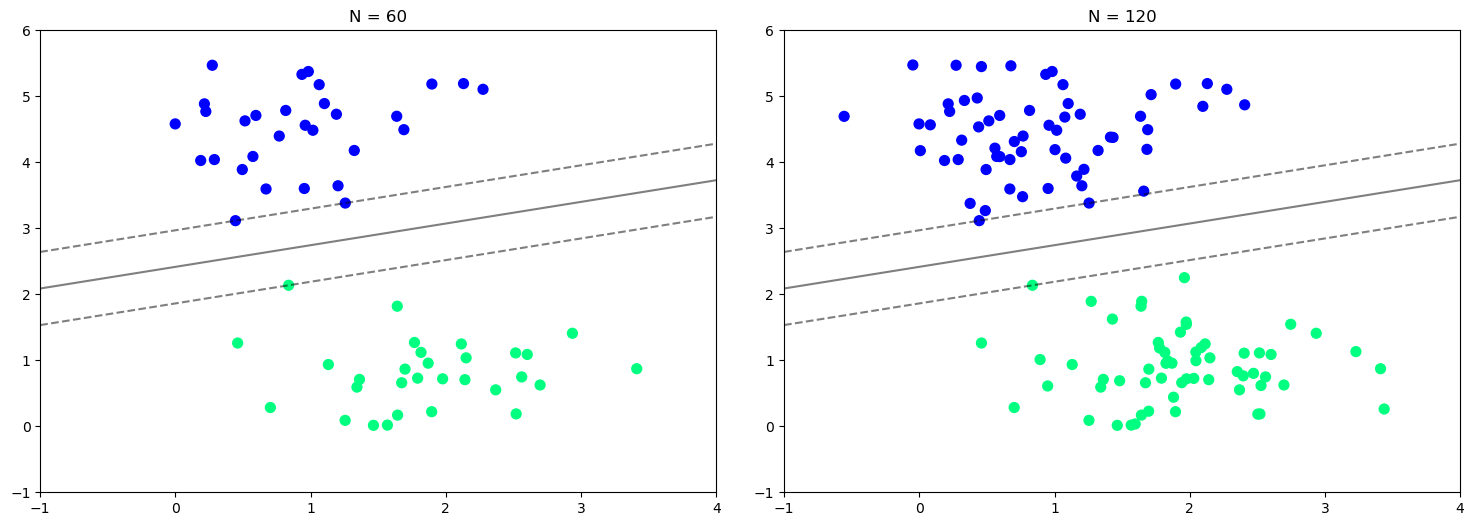

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


#### Soft Margin SVM

It is a type of Support Vector Machine that allows for some misclassification of training data points. It introduces a parameter called *C* to control the penalty for misclassified points. This flexibility helps SVMs to handle noisy or overlapping data sets by finding a balance between maximizing the margin and minimizing the classification errors.

**Cost Function:** 
$$J(W) = \text{argmin}_{(w,b)} \frac{||W||}{2} + C \sum_{i=1}^n \zeta_i$$

Where,
- $\zeta \to$  distance between misclassified point and its actual margin

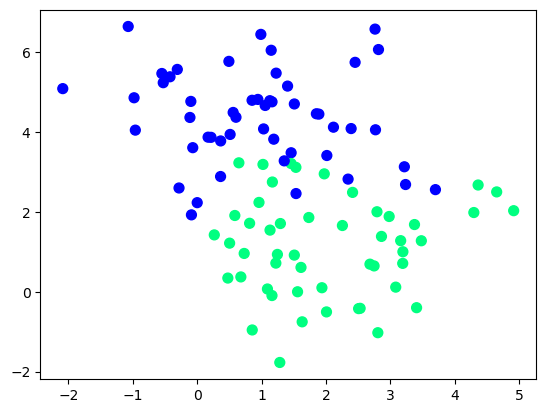

In [10]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

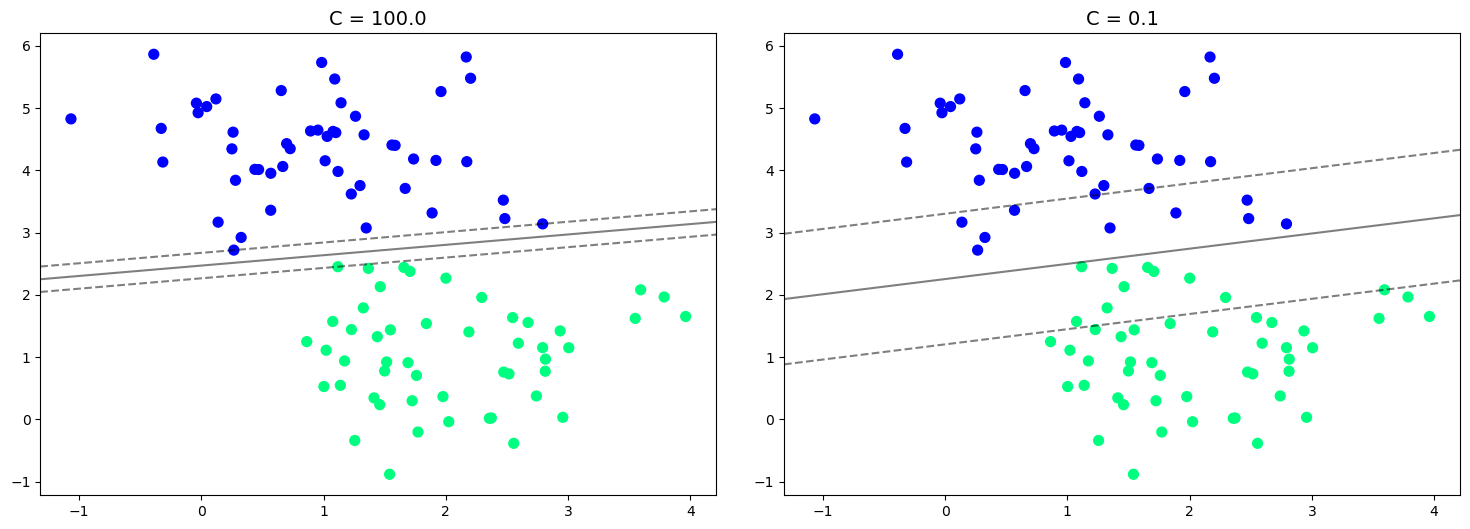

In [11]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Non-Linear Support Vector Machines

It is an extension of SVM that allows for more complex decision boundaries, beyond straight lines or planes. It achieves this by using kernel functions to map the input data into a higher-dimensional space where a linear boundary can be applied. This enables it to handle non-linear relationships between features in the data.

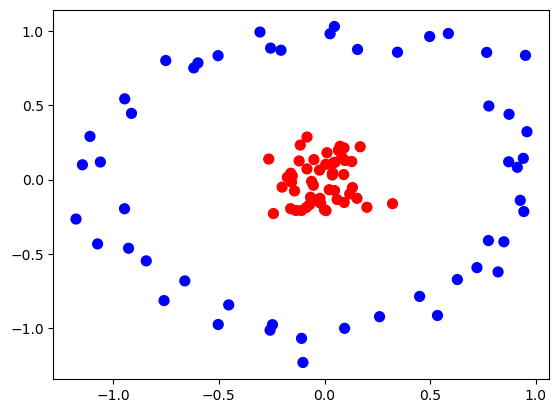

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr');

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=2002)

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")

classifier.fit(X_train, y_train.ravel())
classifier.score(X_test,y_test)

0.6333333333333333

In [16]:
from matplotlib.colors import ListedColormap

zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


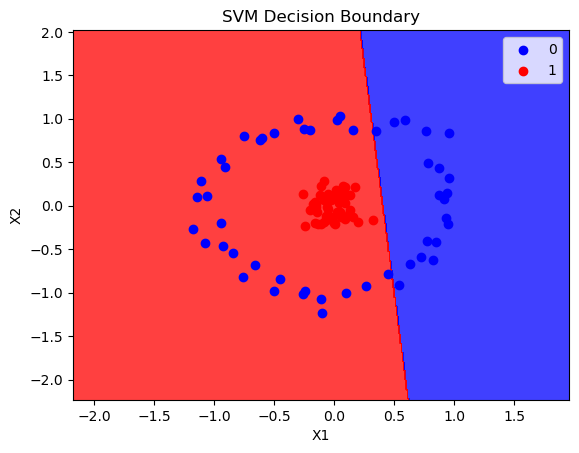

In [17]:
plot_decision_boundary(X, y, classifier)

#### Radial Basis Function Kernel

It is a method used in non-linear SVMs to transform data into a higher-dimensional space, allowing for the creation of more complex decision boundaries. It measures similarity between data points based on their distance and is effective for capturing intricate relationships in the data.

[Support Vector Machines Part 3: The Radial (RBF) Kernel (Part 3 of 3)](https://youtu.be/Qc5IyLW_hns?si=d7f7l9A-tBTcLeeB)

In [18]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax


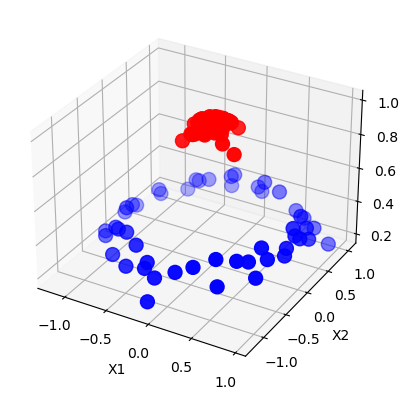

In [19]:
plot_3d_plot(X,y);

In [20]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)

rbf_classifier.score(X_test,y_test)

1.0

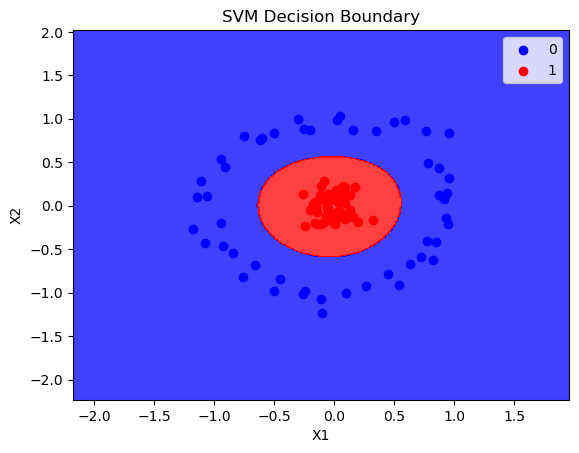

In [21]:
plot_decision_boundary(X, y, rbf_classifier)

#### Polynomial Kernel

It is another type of kernel function used in SVMs. It computes the similarity between two data points by raising the dot product of their feature vectors to a certain power, specified by the degree parameter. This allows SVMs to create non-linear decision boundaries. The polynomial kernel is effective for capturing complex relationships in the data, especially when the data is not linearly separable in the original feature space.

[Support Vector Machines Part 2: The Polynomial Kernel (Part 2 of 3)](https://youtu.be/Toet3EiSFcM?si=VeytYbbe7KwkZWAC)  

In [22]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)

poly_classifier.score(X_test,y_test)

1.0

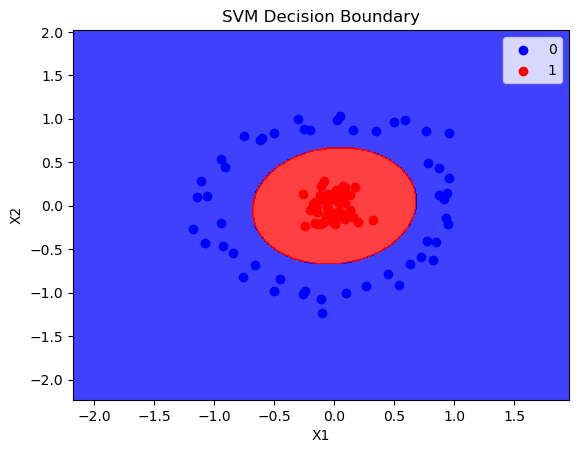

In [23]:
plot_decision_boundary(X, y, poly_classifier)